# ATTENTION: 

Remember to pull before any change and to push often! (Problem on merging)

# Test for project1, sandbox

pour faire plaisir à William, il est demandé de mettre des titres. Faites attention car il a tendance à devenir grumpy si on ne le fait pas 

In [383]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [384]:
from proj1_helpers import *
from data_utility import *


In [385]:
from Regressions import *

### Train Data loading

In [390]:
from proj1_helpers import *

y, X, ids = load_csv_data('../Data/train.csv')
#y, X, ids = load_csv_data('/Users/Marie/Documents/Github/ML_course_Marie/Project_1/all/train.csv')


In [12]:
print('Y shape : ', y.shape)
print('X shape : ', X.shape)

Y shape :  (250000,)
X shape :  (250000, 30)


## which Definition

In [7]:
### Removal of -999 datas

keepers = np.ones(X.shape[1], dtype=bool)
keepers[[4,5,6,12,26,27,28]] = 0

x = X[:,keepers]

print(x.shape)

(250000, 23)


In [9]:
which = [6,17,22]

Scatter plot for 6th feature :


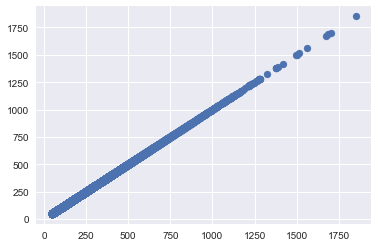

Scatter plot for 17th feature :


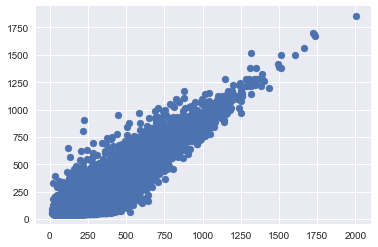

Scatter plot for 22th feature :


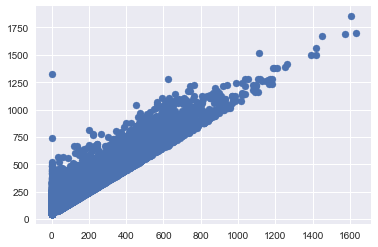

In [12]:
scatter(x,which, other_f= True, against=x[:,6])

### Scatter plots

Scatter plot for 11th feature :


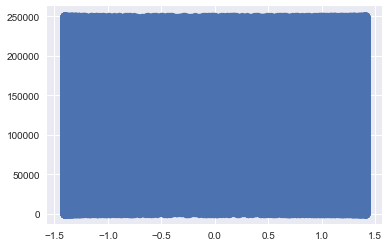

In [11]:
for i in which:
    feature = x[:,i]
    if len(feature[feature==-999]) > 0: #If there is some misplaced value we do not include them in the scatterplot
        print("ATTENTION: missing values in {i}th feature removed!".format(i=i))
    feature = feature[feature>-999]
    plt.scatter(feature, range(len(feature)))
    print("Scatter plot for {i}th feature :".format(i=i))
    plt.show()

### Histograms

In [15]:
def hist_plot(data,i):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins=50, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{i}th feature'.format(i=i))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

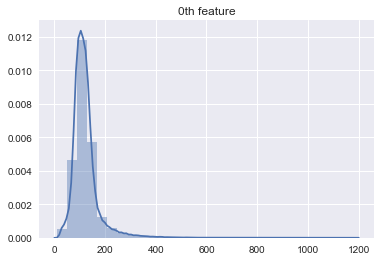

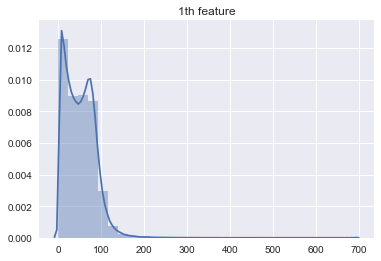

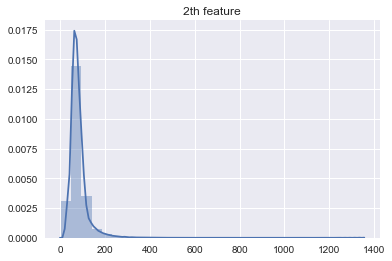

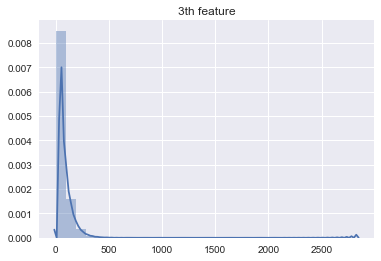

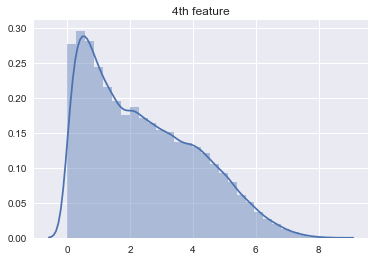

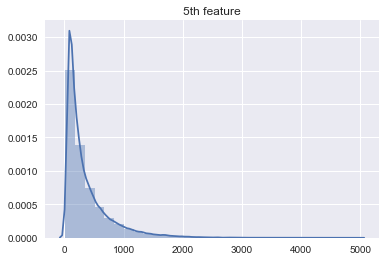

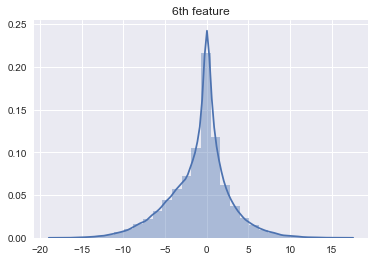

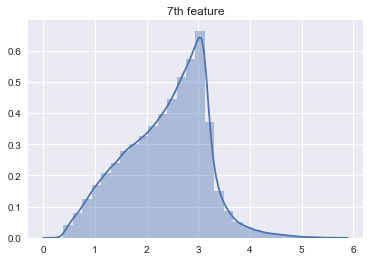

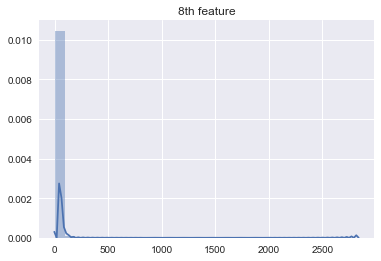

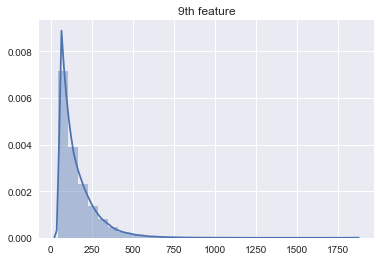

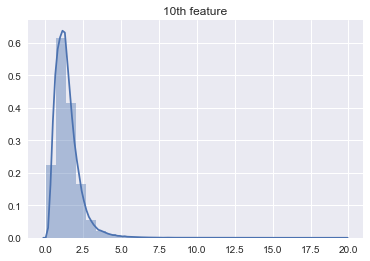

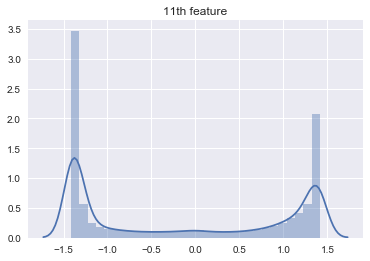

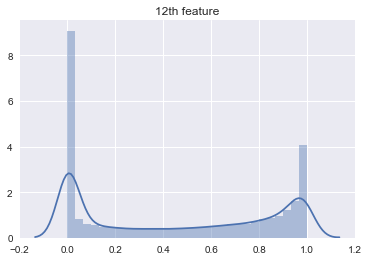

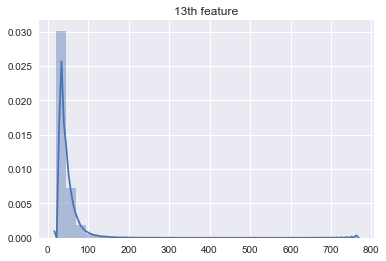

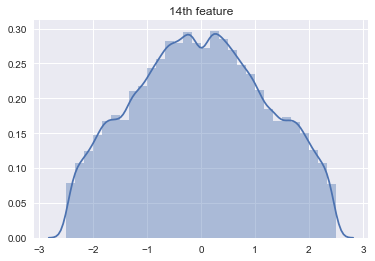

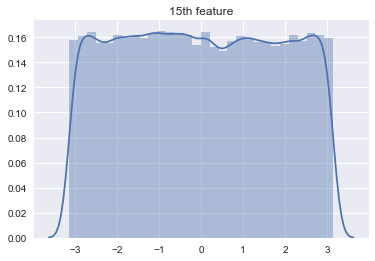

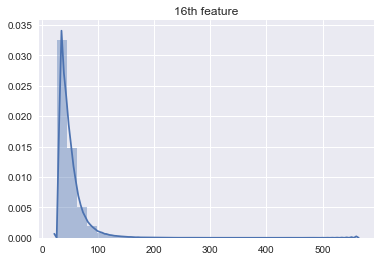

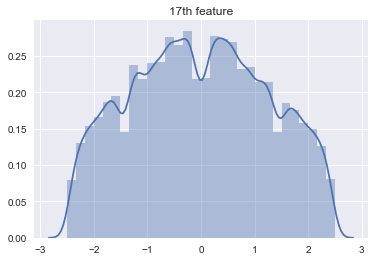

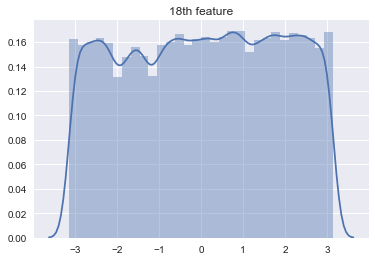

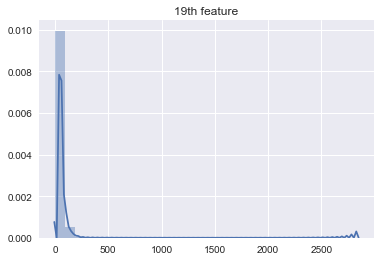

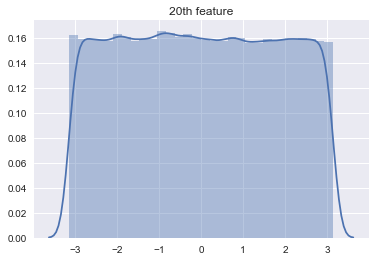

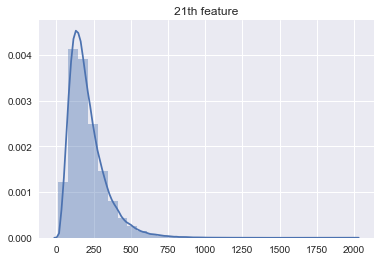

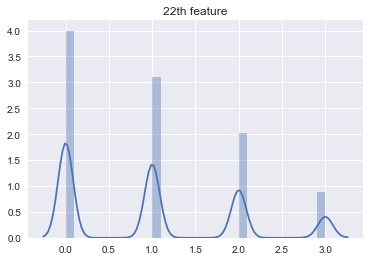

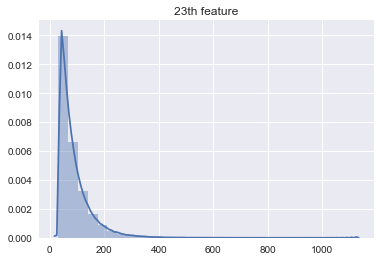

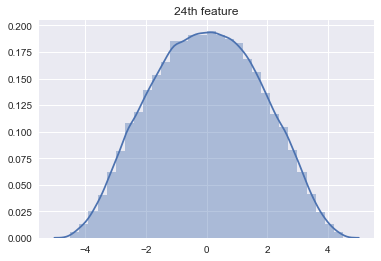

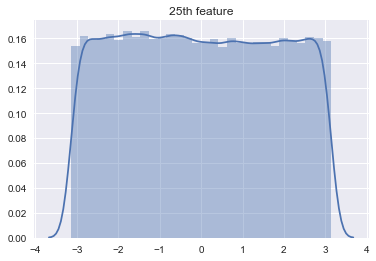

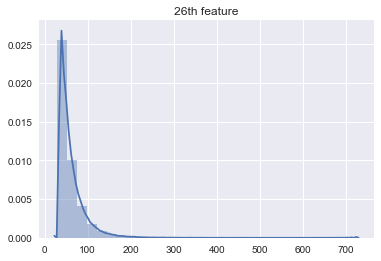

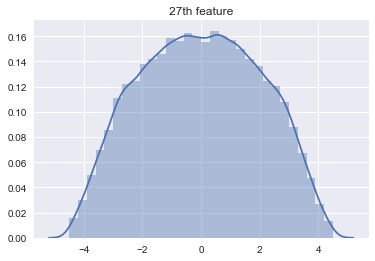

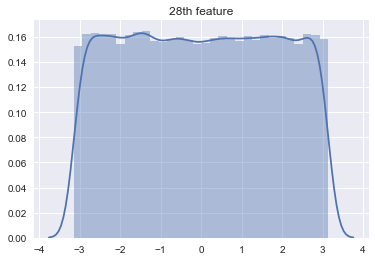

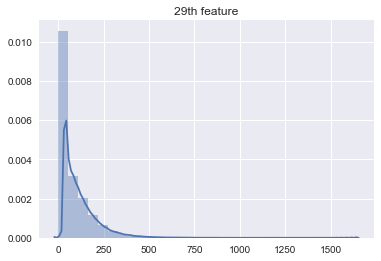

In [518]:
which=range(0,X.shape[1])

for i in which:
    feature = X[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

### Single feature-response plots

Scatter plot for 0th feature :


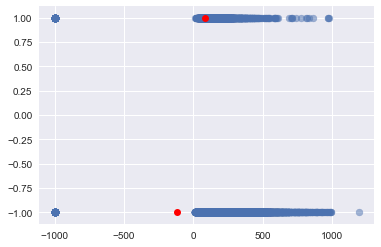

Scatter plot for 1th feature :


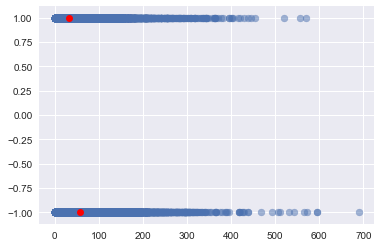

Scatter plot for 2th feature :


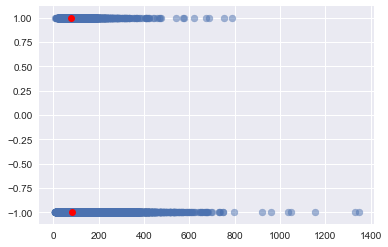

Scatter plot for 3th feature :


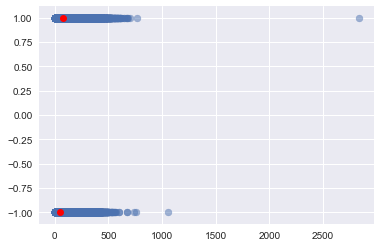

Scatter plot for 4th feature :


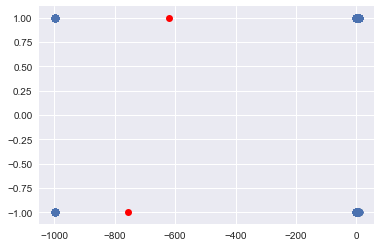

Scatter plot for 5th feature :


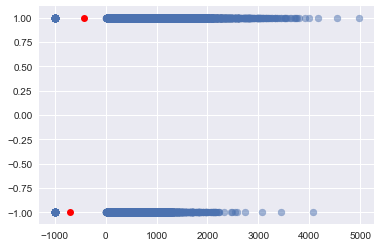

Scatter plot for 6th feature :


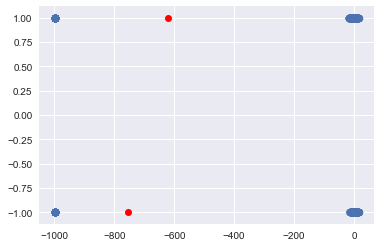

Scatter plot for 7th feature :


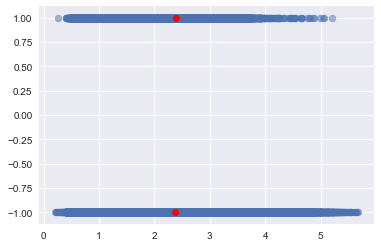

Scatter plot for 8th feature :


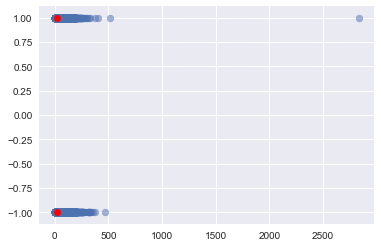

Scatter plot for 9th feature :


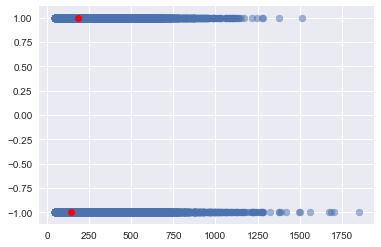

Scatter plot for 10th feature :


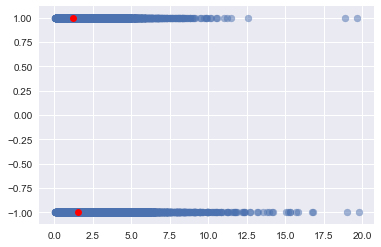

Scatter plot for 11th feature :


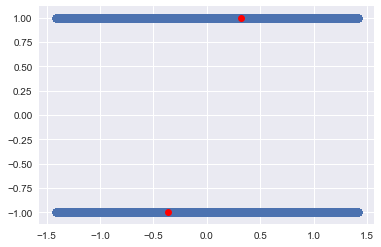

Scatter plot for 12th feature :


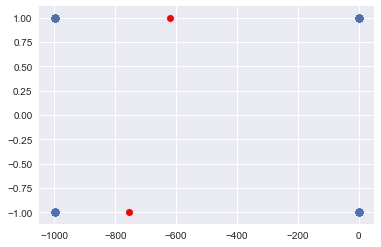

Scatter plot for 13th feature :


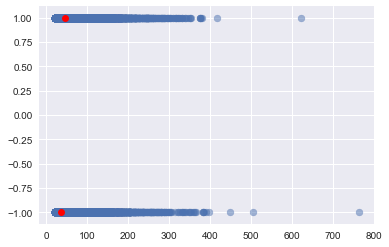

Scatter plot for 14th feature :


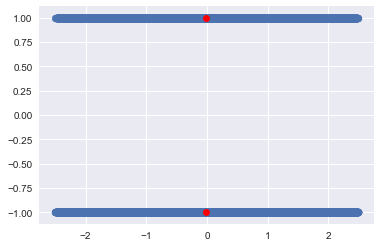

Scatter plot for 15th feature :


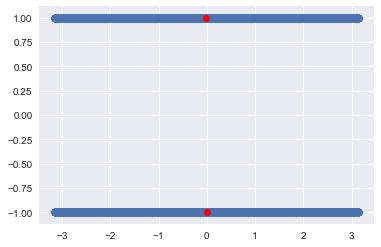

Scatter plot for 16th feature :


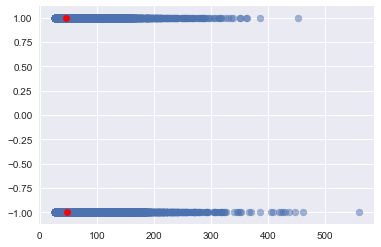

Scatter plot for 17th feature :


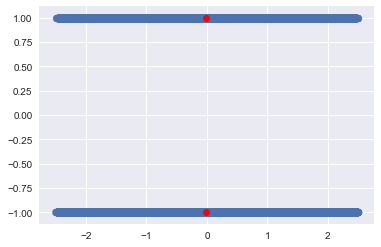

Scatter plot for 18th feature :


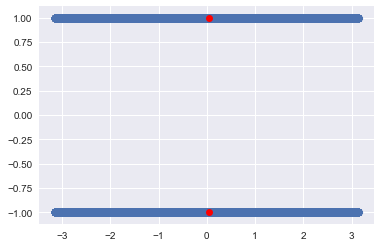

Scatter plot for 19th feature :


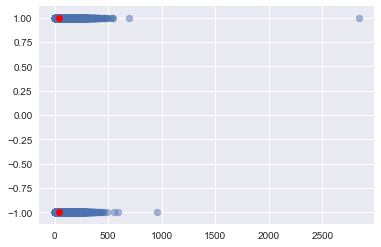

Scatter plot for 20th feature :


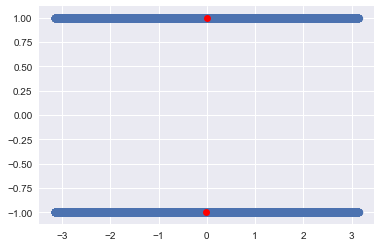

Scatter plot for 21th feature :


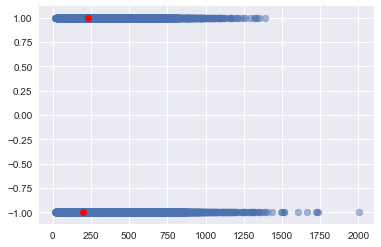

Scatter plot for 22th feature :


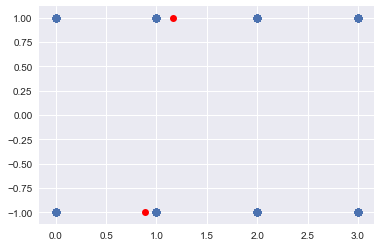

Scatter plot for 23th feature :


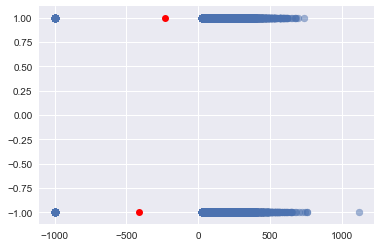

Scatter plot for 24th feature :


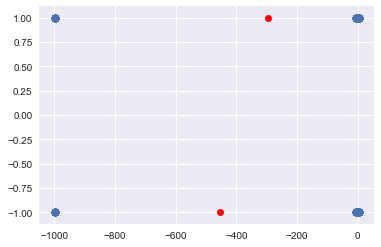

Scatter plot for 25th feature :


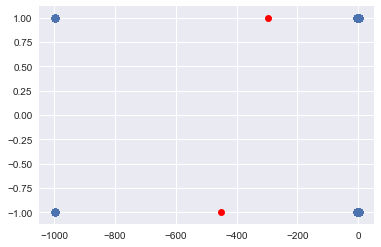

Scatter plot for 26th feature :


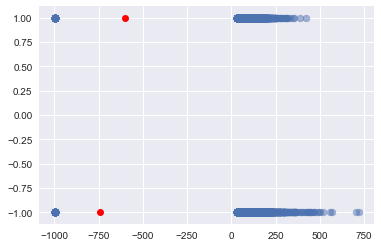

Scatter plot for 27th feature :


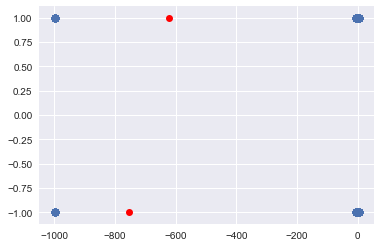

Scatter plot for 28th feature :


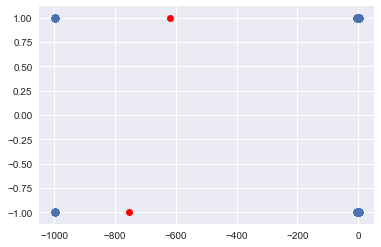

Scatter plot for 29th feature :


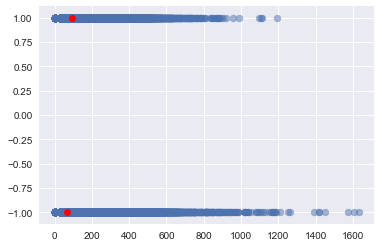

In [17]:
for i in which:
    print("Scatter plot for {i}th feature :".format(i=i))

    t = x[:,i]
    plt.scatter(t,y, alpha = 0.5)
    mean_x1 = np.mean(t[y == 1])
    mean_x0 = np.mean(t[y == -1])
    plt.plot(mean_x0,-1,"or")
    plt.plot(mean_x1,1,"or")
    plt.show()

### Feature boxplots
Visually check influence on response

In [8]:
for i in which:
    feature = x[:,i]
    print("Boxplot for {i}th feature :".format(i=i))
    plt.xlim(left = np.min(feature[feature>-999])-0.5)
    plt.xlim(right = np.max(feature[feature>-999])+.5)
    #the mean is dispayed as a triangle
    yes_feat = feature[y==1]
    no_feat = feature[y==-1]
    plt.boxplot(yes_feat[yes_feat>-999],vert = False, positions=[0],showmeans=True)
    plt.boxplot(no_feat[no_feat>-999], vert = False, positions=[-.25], showmeans=True)
    plt.show()
    


NameError: name 'which' is not defined

### Features with "too many" -999

Checked to eventually remove them.

In [7]:
for i in range(x.shape[1]):
    percentage = len(np.where(x[:,i] < -500)[0])/len(x[:,i])*100
    if percentage > 60:
        print("feature {i}: {percentage} of Na".format(i = i, percentage = percentage))

feature 4: 70.9828 of Na
feature 5: 70.9828 of Na
feature 6: 70.9828 of Na
feature 12: 70.9828 of Na
feature 26: 70.9828 of Na
feature 27: 70.9828 of Na
feature 28: 70.9828 of Na


## Regression

## Data loading

In [66]:
y_tr, X_tr, ids_tr = load_csv_data('/Users/Marie/Documents/Github/ML_course_Marie/Project_1/all/train.csv')
y_te, X_te, ids_te = load_csv_data('/Users/Marie/Documents/Github/ML_course_Marie/Project_1/all/test.csv')

## preliminary treatment

In [67]:
n,p = X_tr.shape
keepers = np.ones(p, dtype=bool)

y_tr[y_tr==-1] = 0
y_te[y_te==-1] = 0

for i in range(p):
    percentage = len(np.where(X_tr[:,i] ==-999)[0])/n*100
    if percentage > 70:
        keepers[i] = 0

print("Removed features: \n",np.where(keepers == 0))
x_tr = X_tr[:,keepers]
x_te = X_te[:,keepers]

n,p = x_tr.shape

Removed features: 
 (array([ 4,  5,  6, 12, 26, 27, 28]),)


In [ ]:
def standardize(x):
    mean_x = np.mean(x)
    x = x-mean_x
    std_x = np.std(x)
    x = x / std_x
    return x

In [ ]:
for i in range(1,tx.shape[1]):
    tx[:,i] = standardize(tx[:,i])

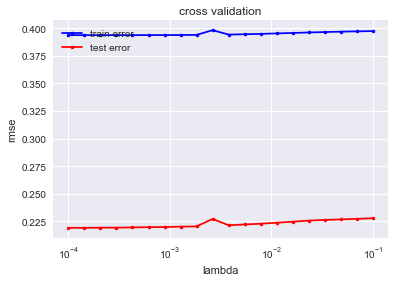

In [68]:
tx = np.c_[np.ones(n),x_tr]
n,p = tx.shape
w = np.zeros(p)
lambdas = np.logspace(-4, -1, 20)
k_fold = 5

# print(ridge_regression(y_tr, x_tr, 1))
w_cv, rmse_tr, rmse_te = cross_validation(y_tr, tx, k_fold, degree=4, lambdas=lambdas)

### Imputation of data

In [ ]:
def inputation(data, method = "mean"):
    '''
    input the missing values with the different methods: mean,median
    
    example of use: data_inputed = inputation(data,method = "median")
    
    for the moment only treat the features number 1,19,20,21 but could be easily generalized if felt necessary
    '''
    
    features_treated = [1,19,20,21]
    
    if method == "mean":
        for i in features_treated:
            t = data[:,i]
            mean = np.mean(t[t != -999])
            data_inputed = data.copy()
            data_inputed[data_inputed == -999] = mean
        
        return data_inputed
    
    if method == "median":
        for i in features_treated:
            t = data[:,i]
            mean = np.median(t[t != -999])
            data_inputed = data.copy()
            data_inputed[data_inputed == -999] = mean
        
        return data_inputed
    
        

In [ ]:
test_data = inputation(x,method = "mean")

### PANDAS

In [13]:
import os
import pandas as pd

In [14]:
path = '/Users/Marie/Documents/Github/ML_course_Marie/Project_1/all/'
os.chdir(path)

In [47]:
data_panda = pd.read_csv('train.csv')

In [48]:
data_panda.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [41]:
data_panda.dtypes

Id                               int64
Prediction                      object
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt       

In [51]:
### Columns which get deleated because of NAN:
data_panda=data_panda.replace(-999,np.nan)
data_panda.iloc[:,[6,7,8,14,28,29,30]].head()

,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi
0,0.91,124.711,2.666,0.2,46.062,1.24,-2.475
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


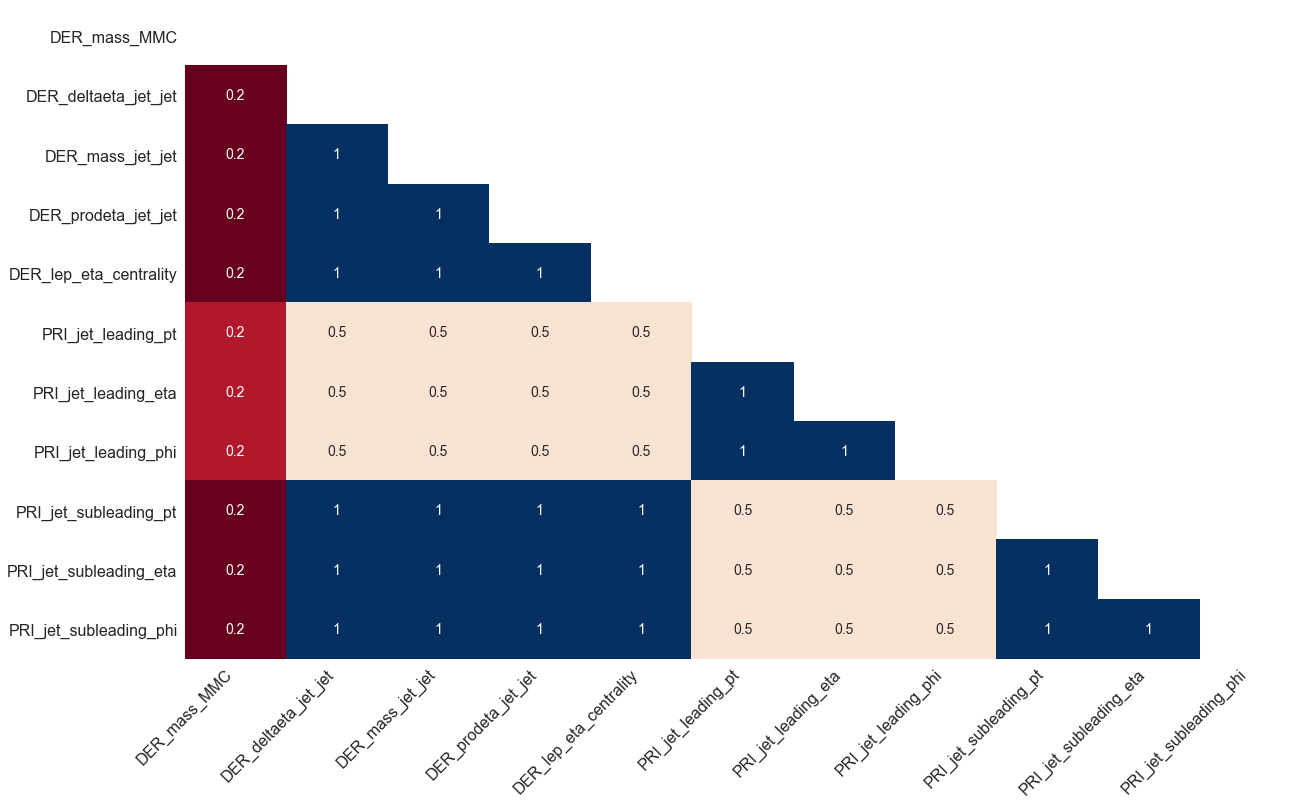

In [72]:
import missingno as msno
msno.heatmap(data_panda)

In [65]:
corr_all = data_panda.corr()
np.argwhere((abs(corr_all.values) > 0.8)&(~(corr_all.values==1)))-1

array([[ 0,  2],
       [ 2,  0],
       [ 3,  9],
       [ 3, 23],
       [ 3, 29],
       [ 4,  6],
       [ 6,  4],
       [ 9,  3],
       [ 9, 21],
       [ 9, 23],
       [ 9, 29],
       [21,  9],
       [21, 29],
       [22, 29],
       [23,  3],
       [23,  9],
       [23, 29],
       [29,  3],
       [29,  9],
       [29, 21],
       [29, 22],
       [29, 23]])

In [57]:
data_clean=data_panda.iloc[:,[2,3,4,5,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,31]]

In [58]:
data_clean.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,113.497
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226
2,NaN,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,44.251
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,0.000
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,0.000


In [59]:
data_clean.iloc[:,[0,1,2,20,21,22]].head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,2.150,0.444,113.497
1,160.937,68.768,103.235,0.725,1.158,46.226
2,NaN,162.172,125.953,2.053,-2.028,44.251
3,143.905,81.417,80.943,NaN,NaN,0.000
4,175.864,16.915,134.805,NaN,NaN,0.000


In [60]:
test1= data_clean.isnull().any(axis=1)
print(len(test1),len(test1[test1==True]), len(test1)-len(test1[test1==True]))

250000 111904 138096


In [61]:
corr = data_clean.corr()
np.argwhere((abs(corr.values) > 0.8)&(~(corr.values==1)))

array([[ 0,  2],
       [ 2,  0],
       [ 3,  6],
       [ 3, 19],
       [ 3, 22],
       [ 6,  3],
       [ 6, 17],
       [ 6, 19],
       [ 6, 22],
       [17,  6],
       [17, 22],
       [18, 22],
       [19,  3],
       [19,  6],
       [19, 22],
       [22,  3],
       [22,  6],
       [22, 17],
       [22, 18],
       [22, 19]])

In [64]:
corr.head(10)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
DER_mass_MMC,1.000000,0.221152,0.911795,0.023743,0.497405,0.013584,0.124621,0.070503,0.020316,0.265951,...,0.003538,-0.003216,0.100093,-0.000081,0.088447,0.015205,0.006454,0.002453,0.006588,0.011093
DER_mass_transverse_met_lep,0.221152,1.000000,0.190109,-0.249116,0.043251,0.017758,-0.146837,0.349504,-0.419757,-0.145464,...,-0.006777,0.000340,0.183716,-0.015925,-0.167811,-0.210537,-0.145892,0.000072,0.006824,-0.210009
DER_mass_vis,0.911795,0.190109,1.000000,-0.062562,0.579712,-0.000702,0.088685,0.097490,-0.090846,0.290011,...,0.002196,-0.002018,-0.087330,-0.001467,0.053300,-0.026860,-0.076472,0.002569,0.005583,-0.052902
DER_pt_h,0.023743,-0.249116,-0.062562,1.000000,-0.539379,0.310501,0.832733,0.089187,0.539356,0.407421,...,0.008354,-0.002923,0.679585,0.008585,0.782547,0.623401,0.826278,0.002842,0.000993,0.808616
DER_deltar_tau_lep,0.497405,0.043251,0.579712,-0.539379,1.000000,-0.148081,-0.432603,0.047046,-0.205441,-0.202035,...,0.000699,-0.000776,-0.402345,-0.001570,-0.407002,-0.347904,-0.483625,-0.000157,0.006808,-0.448737
DER_pt_tot,0.013584,0.017758,-0.000702,0.310501,-0.148081,1.000000,0.381160,0.039193,0.178448,0.095754,...,0.007987,-0.004249,0.269739,0.002515,0.448925,0.360409,0.224787,-0.006168,0.004233,0.403382
DER_sum_pt,0.124621,-0.146837,0.088685,0.832733,-0.432603,0.381160,1.000000,0.108791,0.420679,0.485847,...,0.008781,-0.001892,0.520129,0.006712,0.904481,0.758503,0.879027,0.000969,0.003139,0.965628
DER_pt_ratio_lep_tau,0.070503,0.349504,0.097490,0.089187,0.047046,0.039193,0.108791,1.000000,-0.038803,-0.474633,...,0.002357,-0.005053,0.053386,-0.001186,0.049904,0.056312,0.074943,0.003227,-0.000534,0.079116
DER_met_phi_centrality,0.020316,-0.419757,-0.090846,0.539356,-0.205441,0.178448,0.420679,-0.038803,1.000000,0.140885,...,0.012423,0.000278,0.180756,0.009896,0.423363,0.490057,0.269991,0.005284,0.000005,0.452224
PRI_tau_pt,0.265951,-0.145464,0.290011,0.407421,-0.202035,0.095754,0.485847,-0.474633,0.140885,1.000000,...,0.000053,0.003052,0.176665,0.003296,0.448763,0.205604,0.367877,0.000581,0.004169,0.321341


In [63]:
corr_all.head(10)

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,1.000000,-0.000214,-0.006059,-0.001851,0.002073,0.003741,0.002357,-0.004765,-0.001349,-0.000581,...,-0.001141,0.002312,0.000175,0.002797,0.002993,0.002165,-0.000039,-0.002718,0.003632,0.001024
DER_mass_MMC,-0.000214,1.000000,0.221152,0.911795,0.023743,-0.027467,-0.021716,0.018621,0.497405,0.013584,...,-0.000081,0.088447,0.015205,0.006454,0.002453,0.006588,-0.016114,0.004979,-0.001914,0.011093
DER_mass_transverse_met_lep,-0.006059,0.221152,1.000000,0.190109,-0.249116,-0.134007,-0.132298,0.123520,0.043251,0.017758,...,-0.015925,-0.167811,-0.210537,-0.145892,0.000072,0.006824,-0.036199,0.001802,0.006880,-0.210009
DER_mass_vis,-0.001851,0.911795,0.190109,1.000000,-0.062562,-0.039032,-0.055280,0.032945,0.579712,-0.000702,...,-0.001467,0.053300,-0.026860,-0.076472,0.002569,0.005583,-0.049472,0.002181,-0.000688,-0.052902
DER_pt_h,0.002073,0.023743,-0.249116,-0.062562,1.000000,-0.037698,0.188946,-0.026260,-0.539379,0.310501,...,0.008585,0.782547,0.623401,0.826278,0.002842,0.000993,0.360062,0.000192,-0.007824,0.808616
DER_deltaeta_jet_jet,0.003741,-0.027467,-0.134007,-0.039032,-0.037698,1.000000,0.797181,-0.835993,0.030562,-0.148028,...,-0.003103,-0.141291,-0.175495,-0.043514,-0.002005,-0.000819,-0.090497,-0.004843,0.001234,-0.108775
DER_mass_jet_jet,0.002357,-0.021716,-0.132298,-0.055280,0.188946,0.797181,1.000000,-0.763316,-0.119081,-0.036482,...,0.001166,0.163529,-0.074390,0.283724,-0.000732,0.000983,0.235312,-0.003059,-0.002185,0.240043
DER_prodeta_jet_jet,-0.004765,0.018621,0.123520,0.032945,-0.026260,-0.835993,-0.763316,1.000000,0.010708,0.110272,...,0.002677,0.047484,0.123566,-0.026637,-0.003548,-0.003038,0.002877,-0.002528,0.002133,0.018037
DER_deltar_tau_lep,-0.001349,0.497405,0.043251,0.579712,-0.539379,0.030562,-0.119081,0.010708,1.000000,-0.148081,...,-0.001570,-0.407002,-0.347904,-0.483625,-0.000157,0.006808,-0.231997,0.001928,0.007244,-0.448737
DER_pt_tot,-0.000581,0.013584,0.017758,-0.000702,0.310501,-0.148028,-0.036482,0.110272,-0.148081,1.000000,...,0.002515,0.448925,0.360409,0.224787,-0.006168,0.004233,0.320082,0.000730,-0.004807,0.403382


In [12]:
corr.values[(abs(corr)>0.7)&(~(corr.values==1))]

array([0.91179511, 0.91179511, 0.83273307, 0.78254697, 0.82627761,
       0.80861626, 0.83273307, 0.90448146, 0.75850337, 0.87902697,
       0.96562839, 0.70114222, 0.70114222, 0.78254697, 0.90448146,
       0.70588167, 0.79377594, 0.88441286, 0.75850337, 0.70588167,
       0.80432559, 0.82627761, 0.87902697, 0.79377594, 0.87834684,
       0.80861626, 0.96562839, 0.88441286, 0.80432559, 0.87834684])

In [30]:
test= data_clean.isnull().any(axis=1)
print(len(test),len(test[test==True]), len(test)-len(test[test==True]))

250000 111904 138096


In [38]:
data_clean.iloc[:,[19,20,21]].head()

,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi
0,67.435,2.150,0.444
1,46.226,0.725,1.158
2,44.251,2.053,-2.028
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [44]:
test2 = data_clean.iloc[:,[19]].isnull().any(axis=1)
len(test2[test2==True])

99913

In [21]:
data_clean_no19 = data_clean.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,20,21,22,22]]
data_clean_no19.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_pt,PRI_lep_eta,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,51.626,2.273,16.824,-0.277,258.733,2,2.150,0.444,113.497,113.497
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,36.918,0.501,44.704,-1.916,164.546,1,0.725,1.158,46.226,46.226
2,NaN,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,121.409,-0.953,54.283,-2.186,260.414,1,2.053,-2.028,44.251,44.251
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,53.321,-0.522,31.082,0.060,86.062,0,NaN,NaN,0.000,0.000
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,29.774,0.798,2.723,-0.871,53.131,0,NaN,NaN,0.000,0.000


In [20]:
x= data_clean_no19.isnull().any(axis=1)
print(len(x),len(x[x==True]))

250000 111904


## Several Cross Validations on different parameters

In [4]:
y, X, ids = load_csv_data('../Data/train.csv')

In [5]:
y[y==-1] = 0

## Cross validation without phi


In [272]:
##delete the columns containing phi
X_nophi = np.delete(X,[11,15,18,20,25,28],1)
#impute missing data
X_nophi_impute = imputation(X_nophi,method = "median", features_treated = "all")
#standardize the data
X_nophi_std = standardize_data(X_nophi_impute)

[<function ridge_regression at 0x1089d81e0>, 1e-08] [<function id at 0x1a28221048>, []]


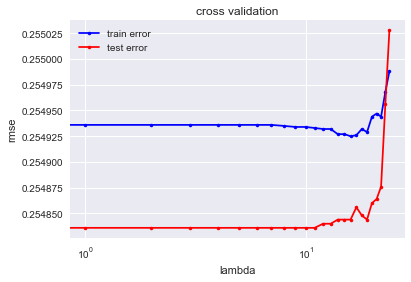

In [271]:
tx = build_poly(X_nophi_std, 1)
y_tr = y
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-8,-3.5,25)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2, only_best=True)

print(method, transformation)

In [120]:
loss_f(err_f(y, tx, linear_predictor, w))

0.265908

## Cross validation with phi but without the nan columns

In [191]:
x_tr_nanout = np.delete(X,[4,5,6,12,26,27,28],1)
x_tr = imputation(x_tr_nanout,method = "median")
x_tr = standardize_data(x_tr)

[<function ridge_regression at 0x1089d81e0>, 6.105402296585326e-05] [<function id at 0x1a28221048>, []]


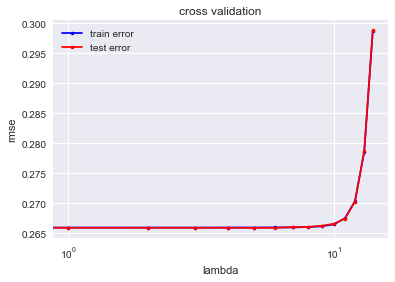

In [196]:
tx = build_poly(x_tr, 1)
y_tr = y
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-6,-1,15)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2)

print(method, transformation)

## Model with no filtering

In [189]:
x_tr = imputation(X,method = "median")
x_tr = standardize_data(x_tr)

[<function ridge_regression at 0x1089d81e0>, 4.393970560760786e-08] [<function id at 0x1a28221048>, []]


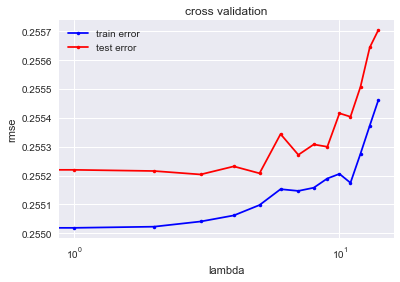

In [190]:
tx = build_poly(x_tr, 1)
y_tr = y
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-8,-5,15)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2)

print(method, transformation)

## Prediction test

In [140]:
def predict_labels(w,tx):
    return tx.dot(w)

In [141]:
y_test, x_all_test, ids_test = load_csv_data('../Data/test.csv')


In [20]:
#delete the phi columns
x_test = np.delete(x_all_test,[11,15,18,20,25,28],1)

In [21]:
x_test = inputation(x_test,method = "median", features_treated = "all")
x_test = standardize_data(x_test)
tx = build_poly(x_test, 1)
tx.shape

(568238, 25)

In [25]:
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)

In [26]:
y_pred

array([-0.05571909,  0.16469452,  0.356913  , ...,  0.52096213,
        0.44875307,  0.14799981])

In [27]:
y_predict

array([0., 0., 0., ..., 1., 0., 0.])

In [28]:
y_predict[y_predict==0]=-1
y_predict

array([-1., -1., -1., ...,  1., -1., -1.])

In [29]:
create_csv_submission(ids_test, y_predict, "../Data/test_Marie.csv")

## Change Feature space

In [243]:
x_tr = imputation(X,method = "median", features_treated = "all")


In [244]:
#now: 15, 18, 20, 25 & 28 are getting replaced by: 18-15, 20-15, 25-15 and 28-15
n,p=x_tr.shape
x_new = np.zeros((n,p+4))
#create matrix with 4 extra columns
x_new[:,:-4] = x_tr
#add new features
x_new[:,p]=x_tr[:,18]-x_tr[:,15]
x_new[:,p+1]=x_tr[:,20]-x_tr[:,15]
x_new[:,p+2]=x_tr[:,25]-x_tr[:,15]
x_new[:,p+3]=x_tr[:,28]-x_tr[:,15]

##adjust rotated phi to have values between +pi and -pi
x_new[:, p] = (x_new[:, p]+3*np.pi)% (2*np.pi) - np.pi
x_new[:,p+1]=(x_new[:, p+1]+3*np.pi)% (2*np.pi) - np.pi
x_new[:,p+2]=(x_new[:, p+2]+3*np.pi)% (2*np.pi) - np.pi
x_new[:,p+3]=(x_new[:, p+3]+3*np.pi)% (2*np.pi) - np.pi

In [245]:
3%2

1

In [246]:
#delete 15, 18, 20, 25 & 28
x_reduced = np.delete(x_new, [15, 18, 20, 25, 28], 1)

In [247]:
#if 18-15 (4th last column) is negative the sign of the new features will be flipped
#create a mask
use_neg = (x_reduced[:,-4]<0)
x_reduced[use_neg, -4:]= x_reduced[use_neg, -4:]*(-1)

In [248]:
which = [25,26, 27, 28]

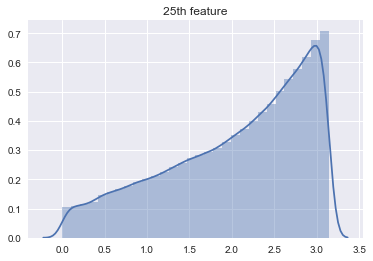

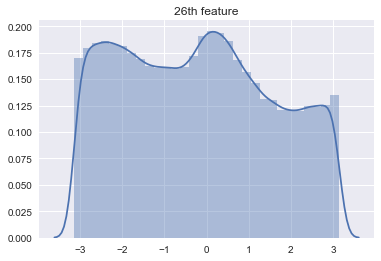

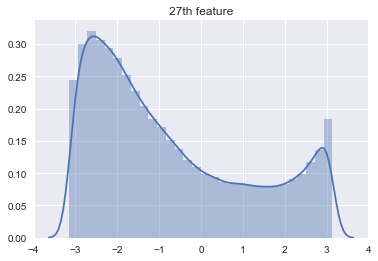

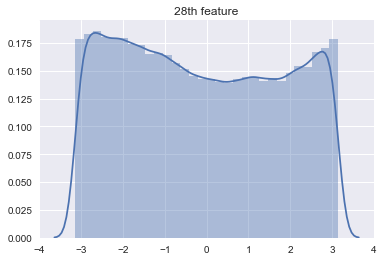

In [249]:
for i in which:
    feature = x_reduced[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

In [224]:
#also if 14 is negative multiply by -1 (14, 17, 24, 27) --> (14, 16, 21, 23)
use_neg = (x_reduced[:,14]<0)

#x_reduced[use_neg, :][:, [14,16,21,23]] = -x_reduced[use_neg, :][:, [14,16,21,23]]

x_reduced[use_neg,14] = x_reduced[use_neg,14]*(-1)
x_reduced[use_neg,16] = x_reduced[use_neg,16]*(-1)
x_reduced[use_neg,21] = x_reduced[use_neg,21]*(-1)
x_reduced[use_neg,23] = x_reduced[use_neg,23]*(-1)




In [228]:
which = [14,16, 21, 23]

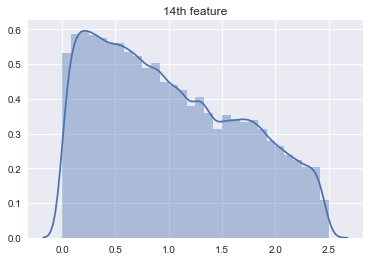

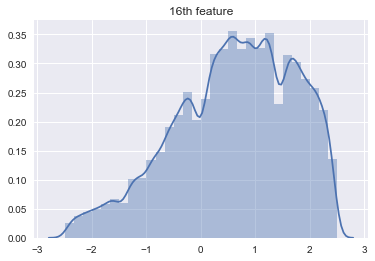

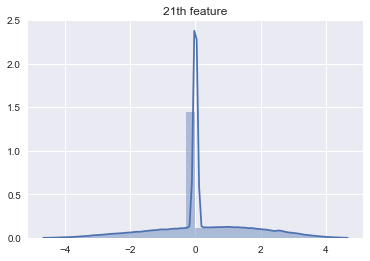

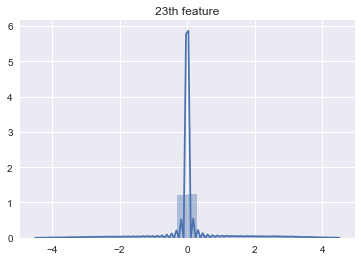

In [229]:
for i in which:
    feature = x_reduced[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

In [250]:
x_reduced_std = standardize_data(x_reduced)
tx = build_poly(x_reduced_std, 1)
y_tr = y

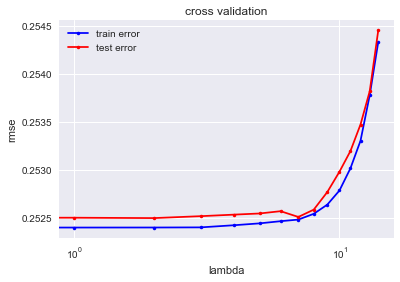

In [253]:
#get the best parameters

w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-4,-2,15)
k_fold = 10

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2, only_best=True)

In [136]:
print(transformation, method)

[<function id at 0x1a28221048>, []] [<function ridge_regression at 0x1089d81e0>, 8.659643233600653e-08]


In [171]:
predictor, w, loss = ridge_regression(y_tr, x_tr, lambda_=10**(-7))

In [172]:
w

array([ 1.04672582e-04, -3.61077958e-03, -3.15051397e-03,  8.18751668e-05,
        3.97376413e-03,  2.46809084e-04,  4.43451109e-04,  1.73290967e-01,
       -6.64419074e-04, -3.74889355e-01, -1.13390152e-01,  5.04268428e-02,
        1.71787344e-01,  3.78879780e-01, -3.07853880e-04, -2.45642151e-04,
        3.81408659e-01, -2.88458356e-04,  6.92304662e-04,  1.51805060e-03,
        2.63841431e-04, -2.00249162e-04,  3.88827800e-03, -8.06216293e-04,
        2.09155987e-04,  1.08190765e-04, -1.16453117e-03,  6.98625631e-04,
       -8.41080342e-04,  3.75091143e-01])

## Cross validation without phi and eta changed

In [290]:
##delete the columns containing phi (except if phi is in derived)
X_nophi = np.delete(X,[11,15,18,20,25,28],1)
#impute missing data
X_nophi_impute = imputation(X_nophi,method = "median", features_treated = "all")
#standardize the data
X_nophi_std = standardize_data(X_nophi_impute)

In [291]:
#also if 14 is negative multiply by -1 (14, 17, 24, 27) --> (14, 16, 21, 23)
use_neg = (X_nophi_std[:,13]<0)

X_nophi_std[use_neg,13] = X_nophi_std[use_neg,13]*(-1)
X_nophi_std[use_neg,15] = X_nophi_std[use_neg,15]*(-1)
X_nophi_std[use_neg,20] = X_nophi_std[use_neg,20]*(-1)
X_nophi_std[use_neg,22] = X_nophi_std[use_neg,22]*(-1)



[<function ridge_regression at 0x1089d81e0>, 1e-08] [<function id at 0x1a28221048>, []]


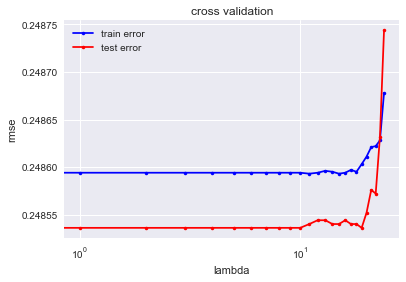

In [292]:
tx = build_poly(X_nophi_std, 1)
y_tr = y
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-8,-3.5,25)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2, only_best=True)

print(method, transformation)

In [293]:
func, par = method

In [294]:
print(func, par)

<function ridge_regression at 0x1089d81e0> 1e-08


In [295]:
predictor, w, loss = func(y_tr, tx, par)

## Submit prediction

In [140]:
def predict_labels(w,tx):
    return tx.dot(w)

In [284]:
y_test, x_all_test, ids_test = load_csv_data('../Data/test.csv')


In [296]:
#delete the phi columns
x_test = np.delete(x_all_test,[11,15,18,20,25,28],1)

In [297]:
x_test = imputation(x_test,method = "median", features_treated = "all")

In [298]:
#also if 14 is negative multiply by -1 (14, 17, 24, 27) --> (13, 15, 20, 22)
use_neg = (x_test[:,13]<0)

x_test[use_neg,13] = x_test[use_neg,13]*(-1)
x_test[use_neg,15] = x_test[use_neg,15]*(-1)
x_test[use_neg,20] = x_test[use_neg,20]*(-1)
x_test[use_neg,22] = x_test[use_neg,22]*(-1)

In [299]:
x_test = standardize_data(x_test)
tx = build_poly(x_test, 1)
tx.shape

(568238, 25)

In [300]:
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)

In [301]:
y_predict[y_predict==0]=-1
y_predict

array([-1., -1., -1., ...,  1., -1., -1.])

In [302]:
create_csv_submission(ids_test, y_predict, "../Data/test_Marie.csv")

## Logistic Regression

In [ ]:


w, loss = reg_logistic_regression(y, x, lambda_, initial_w, max_iters = 100, gamma =0.000005 , printing = False, pred = False)

## Scikit Library for Logistic Regression

In [261]:
from sklearn.linear_model import LogisticRegression

x_tr = imputation(X,method = "median")
x_tr = standardize_data(x_tr)

clf = LogisticRegression(random_state=0, solver='sag',
                         multi_class='multinomial', max_iter = 500).fit(x_tr, y)

 



/Users/Marie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [262]:
clf.predict(x_tr)

array([0., 1., 0., ..., 0., 1., 0.])

In [263]:
clf.predict_proba(x_tr)

array([[0.55229224, 0.44770776],
       [0.46710327, 0.53289673],
       [0.74217012, 0.25782988],
       ...,
       [0.60740648, 0.39259352],
       [0.43084256, 0.56915744],
       [0.74844193, 0.25155807]])

In [264]:
clf.score(x_tr, y)

0.750272

In [265]:
clf.coef_

array([[ 1.09370990e-01, -3.26907032e-01, -5.39723105e-01,
         1.09912689e-01, -2.17359092e-02,  7.22541389e-01,
        -2.00518477e-01,  5.16110322e-01, -1.72504389e-03,
        -1.74526717e-02, -3.81394476e-01,  1.14564811e-01,
         9.91709052e-02,  2.75283008e-01, -7.87384804e-04,
        -1.08515743e-03,  5.21632374e-01, -1.26373389e-03,
         3.54075055e-03,  1.18796806e-01,  5.08701995e-04,
        -1.00582706e-01, -2.35027927e-01,  5.78757902e-02,
         8.46971242e-02,  7.79372905e-02, -5.97060598e-02,
        -5.94751928e-02, -1.37089775e-01, -2.00926503e-01]])

## Submit Prediction

In [142]:
def predict_labels(w,tx):
    return tx.dot(w)

In [174]:
y_test, x_test, ids_test = load_csv_data('../Data/test.csv')

In [175]:
x_test = imputation(x_test,method = "median", features_treated = "all")

n,p=x_test.shape
x_new = np.zeros((n,p+4))
#create matrix with 4 extra columns
x_new[:,:-4] = x_test
#add new features
x_new[:,p]=x_test[:,18]-x_test[:,15]
x_new[:,p+1]=x_test[:,20]-x_test[:,15]
x_new[:,p+2]=x_test[:,25]-x_test[:,15]
x_new[:,p+3]=x_test[:,28]-x_test[:,15]
#delete 15, 18, 20, 25 & 28
x_reduced = np.delete(x_new, [15, 18, 20, 25, 28], 1)

#if 18-15 (4th last column) is negative the sign of the new features will be flipped
#create a mask
use_neg = (x_reduced[:,-4]<0)
x_reduced[use_neg, -4:]= x_reduced[use_neg, -4:]*(-1)

tx = build_poly(x_reduced, 1)
tx.shape

(568238, 30)

In [176]:
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)
y_predict[y_predict==0]=-1

In [177]:
create_csv_submission(ids_test, y_predict, "../Data/test_Marie2.csv")

## Data Cleaning

In [519]:
x_nan = X.copy()
x_nan[x_nan==-999]=np.nan
y[y==-1] = 0

In [427]:
# add log transformations

x_nan[:,3] = np.log(x_nan[:,3]+1)
x_nan[:,8] = np.log(x_nan[:,8]+1)
x_nan[:,13] = np.log(x_nan[:,13]+1)
x_nan[:,16] = np.log(x_nan[:,16]+1)
x_nan[:,19] = np.log(x_nan[:,19]+2)
x_nan[:,23] = np.log(x_nan[:,22]+2)
x_nan[:,29] = np.log(x_nan[:,28]+1)

/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


In [489]:
#define an acceptable range for each feature
m = 2

features_tested = np.delete(np.arange(x_nan.shape[1]),[22])

for i in features_tested:
    feature = x_nan[:,i]
    outliers = feature[abs(feature - np.nanmean(feature)) > m * np.nanstd(feature)]
    percentage = len(outliers)/len(feature)*100
    if percentage!=0:
        print("feature {i}: {percentage} outliers".format(i = i, percentage = percentage))

/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


feature 0: 3.1836 outliers
feature 1: 2.4464 outliers
feature 2: 3.8615999999999997 outliers
feature 3: 4.8756 outliers
feature 4: 0.9915999999999999 outliers
feature 5: 1.5091999999999999 outliers
feature 6: 1.8648000000000002 outliers
feature 7: 4.3612 outliers
feature 8: 3.65 outliers
feature 9: 4.7219999999999995 outliers
feature 10: 3.7756 outliers
feature 13: 3.9892 outliers
feature 14: 0.6648000000000001 outliers
feature 16: 4.2212 outliers
feature 19: 4.0496 outliers
feature 21: 4.5036 outliers
feature 23: 2.846 outliers
feature 24: 1.6431999999999998 outliers
feature 26: 1.2352 outliers
feature 27: 0.4356 outliers
feature 29: 4.7328 outliers


In [520]:
# take out the outliers

def outlier_cleaning(data, y, features_treated = "all", m=2):
    if features_treated == "all":
        #features_treated = range(0,data.shape[1])
        features_treated = np.delete(np.arange(data.shape[1]),[22])
        
        
    data_clean = data.copy()
    y_clean = y.copy()
    
    for i in features_treated:
        feature = data_clean[:,i]
        outliers = abs(feature - np.nanmean(feature)) > m * np.nanstd(feature)
        data_clean = data_clean[~outliers,:]
        y_clean = y_clean[~outliers]
    return data_clean, y_clean

In [521]:
print(x_nan.shape)

x_clean, y_clean = outlier_cleaning(x_nan, y, "all")

x_clean.shape

(250000, 30)


/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


(130261, 30)

## Test on all the features with this cleaning

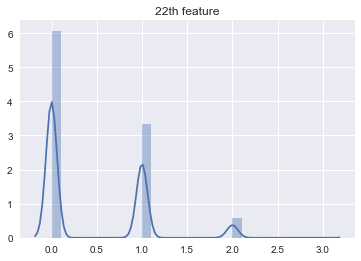

In [524]:
which = [22]
for i in which:
    feature = x_clean[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

In [525]:
x_clean[np.isnan(x_clean)]=-999
x_tr = imputation(x_clean,method = "median")
feat_22 = x_tr[:,22].copy()
x_tr = standardize_data(x_tr)
x_tr[:,22]=feat_22

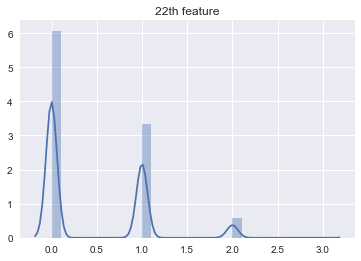

In [526]:
which = [22]
for i in which:
    feature = x_tr[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

Testing for method ridge_regression... Be patient! ;)
[<function ridge_regression at 0x1aa77ae730>, 0.0013894954943731374] [<function id at 0x1ab79b1d08>, []]


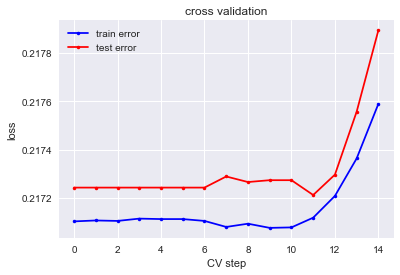

In [527]:
tx = build_poly(x_tr, 1)
y_tr = y_clean
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-6,-2,15)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2, only_best=True)

print(method, transformation)

In [528]:
print(loss_te)

0.2172117303853831


## Test clean data on dataset without phi features and eta transformation

In [529]:
##delete the columns containing phi (except if phi is in derived)
X_nophi = np.delete(x_clean,[11,15,18,20,25,28],1)
#impute missing data
X_nophi_impute = imputation(X_nophi,method = "median", features_treated = "all")
#standardize the data
feat_22 = X_nophi_impute[:,18].copy()
X_nophi_std = standardize_data(X_nophi_impute)
X_nophi_std[:,18]=feat_22

In [530]:
#also if 14 is negative multiply by -1 (14, 17, 24, 27) --> (13, 15, 20, 22)
use_neg = (X_nophi_std[:,13]<0)

X_nophi_std[use_neg,13] = X_nophi_std[use_neg,13]*(-1)
X_nophi_std[use_neg,15] = X_nophi_std[use_neg,15]*(-1)
X_nophi_std[use_neg,20] = X_nophi_std[use_neg,20]*(-1)
X_nophi_std[use_neg,22] = X_nophi_std[use_neg,22]*(-1)



Testing for method ridge_regression... Be patient! ;)
[<function ridge_regression at 0x1aa77ae730>, 0.00017782794100389227] [<function id at 0x1ab79b1d08>, []]


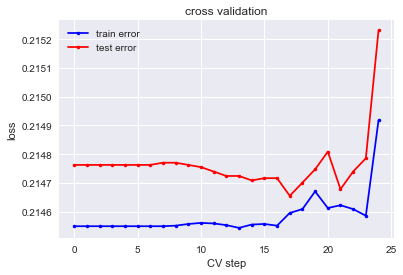

In [531]:
tx = build_poly(X_nophi_std, 1)
y_tr = y_clean
w = np.zeros(tx.shape[1])
# lambdas = [10**(-5.5625)]
lambdas = np.logspace(-8,-2,25)
k_fold = 5

transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2, only_best=True)

print(method, transformation)

In [532]:
func, par = method
par

0.00017782794100389227

In [533]:
print(func, par)

<function ridge_regression at 0x1aa77ae730> 0.00017782794100389227


In [534]:
predictor, w, loss = func(y_tr, tx, par, pred = True)

## Submit prediction

In [535]:
def predict_labels(w,tx):
    return tx.dot(w)

In [409]:
y_test, x_all_test, ids_test = load_csv_data('../Data/test.csv')


In [536]:
#delete the phi columns
x_test = np.delete(x_all_test,[11,15,18,20,25,28],1)

In [537]:
x_test = imputation(x_test,method = "median", features_treated = "all")

In [538]:
#also if 14 is negative multiply by -1 (14, 17, 24, 27) --> (13, 15, 20, 22)
use_neg = (x_test[:,13]<0)

x_test[use_neg,13] = x_test[use_neg,13]*(-1)
x_test[use_neg,15] = x_test[use_neg,15]*(-1)
x_test[use_neg,20] = x_test[use_neg,20]*(-1)
x_test[use_neg,22] = x_test[use_neg,22]*(-1)

In [539]:
feat_22 = x_test[:,18].copy()
x_test = standardize_data(x_test)
x_test[:,18]=feat_22

tx = build_poly(x_test, 1)
tx.shape

(568238, 25)

In [540]:
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)

In [541]:
y_predict[y_predict==0]=-1
y_predict

array([-1., -1., -1., ...,  1., -1., -1.])

In [542]:
create_csv_submission(ids_test, y_predict, "../Data/test_Marie.csv")